# Pacotes

TensorFlow: Biblioteca para construir e treinar modelos de aprendizado de máquina.

boston_housing: Dataset embutido no Keras contendo informações de preços de casas em Boston.

layers, models: Módulos do Keras para definir e estruturar redes neurais.

NumPy: Biblioteca para manipulação de arrays e cálculos numéricos.

Matplotlib: Biblioteca para visualização e gráficos.

In [1]:
import os
import random
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Definir a seed para reprodutibilidade
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

initializer = tf.keras.initializers.GlorotUniform(seed=seed)

tf.config.experimental.enable_op_determinism()

# Importa Dataset Boston Housing

boston_housing.load_data(): Divide os dados em conjuntos de treino e teste.
Normalização: Reduz as diferenças de escala entre as features, melhorando a eficiência do treinamento.

In [2]:
# Carregar dados do conjunto Boston Housing Prices
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Normalizar os dados
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Tensorflow

## Define Modelo

Sequential: Modelo de rede neural em que camadas são empilhadas sequencialmente.

Camada 1: 32 neurônios, ativação ReLU, entrada compatível com as features.

Camada 2: 15 neurônios, ativação ReLU.

Camada 3: 1 neurônio, ativação linear, saída para prever o preço de uma casa (valor contínuo).


In [3]:
# Definir o modelo
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)),
    layers.Dense(15, activation='relu'),
    layers.Dense(1, activation='linear')  # Camada de saída para a previsão do preço da casa
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compila Modelo

Otimizador: RMSprop, ajusta os pesos da rede durante o treinamento.

Função de perda: Erro quadrático médio (MSE), mede a diferença entre previsões e valores reais.

Métrica: Erro médio absoluto (MAE), fornece a média das diferenças absolutas entre as previsões e os valores reais.

In [4]:
# Compilar o modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Treina Modelo

fit: Treina o modelo nos dados.

Épocas: Número de iterações completas sobre os dados (100).

Batch size: Número de amostras processadas antes de atualizar os pesos (1).

validation_split: Usa 20% dos dados de treinamento para validação.

verbose=0: Suprime a exibição detalhada do progresso.


In [5]:
# Treinar o modelo
history = model.fit(train_data, train_targets, epochs=100, batch_size=1, verbose=0, validation_split=0.2)

## Avalia Resultados

In [6]:
# Avaliar o modelo nos dados de teste
test_loss, test_mae = model.evaluate(test_data, test_targets)
print(f'Erro médio absoluto nos dados de teste: {test_mae:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.7090 - mae: 2.6666
Erro médio absoluto nos dados de teste: 2.90


# Gráfico

Curvas de erro: Gráfico que mostra como o erro médio absoluto varia ao longo do treinamento.

mae: Erro no treinamento.

val_mae: Erro na validação.

Visualização: Ajuda a identificar problemas como overfitting ou underfitting.

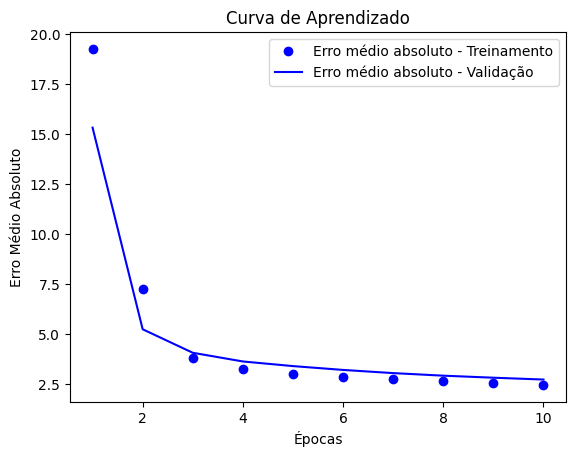

In [ ]:
# Plotar a curva de aprendizado
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Erro médio absoluto - Treinamento')
plt.plot(epochs, val_mae, 'b', label='Erro médio absoluto - Validação')
plt.title('Curva de Aprendizado')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Absoluto')
plt.legend()